# Risk #

## Brief (Part One) ##

Simulate 1,000 individual battle rounds in Risk (3 attackers vs 2 defenders) and plot the results.

There are three possible outcomes for each individual battle from the Attacker's perspective: 
1. Attacker wins with two dice.
2. Attacker wins with one die and loses with the other.
3. Attacker wins with no dice.

A pie chart with the 'Attacker Win' percentages can represent these outcomes.

## References ##

The following resources were used as part of research for this assignment. The Python Coding book was particularly useful:

- [Rules of the game](https://www.ultraboardgames.com/risk/game-rules.php)
- [Hasbro Risk Part 1: Mechanics and basic probabilities](https://medium.com/techfront/winning-at-risk-with-python-part-1-40d17d39d1e2)
- [DataGenetics RISK Analysis](http://datagenetics.com/blog/november22011/index.html)
- [The Python Coding Book: Using numpy to improve board game strategy](https://thepythoncodingbook.com/2022/12/30/using-python-numpy-to-improve-board-game-strategy-risk)

## Import libraries ##

In [1]:
# Import required libraries.
import numpy as np
import matplotlib.pyplot as plt

## Data Generation ##

Set random number generator `rng` and `simulations` variables.

In [2]:
# For random number generation, use numpy's Random Generator recommended constructor default_rng: 
# https://numpy.org/doc/stable/reference/random/generator.html#random-generator
rng = np.random.default_rng()

# Set number of simulations as a variable
simulations = 1000

Generate simulations of Attacker and Defender dice rolls, sorting them in descending order.

In [52]:
# Generate #simulations of Attacker dice rolls and store in a 2 dimensional (simulations, 3) numpy array.
attack = rng.integers(1, 7, size = (simulations, 3))

# Generate #simulations of Defender dice rolls and store in a 2 dimensional (simulations, 2) numpy array.
defence = rng.integers(1, 7, size = (simulations, 2))

# Sort (ascending): 
# https://numpy.org/doc/stable/reference/generated/numpy.sort.html
attack.sort()
defence.sort()

# Flip (descending): 
# https://numpy.org/doc/stable/reference/generated/numpy.flip.html
attack = np.flip(attack)
defence = np.flip(defence)

# Print (truncated) attack and defence arrays.
print(attack)
print(defence)

[[5 2 2]
 [4 2 2]
 [6 5 5]
 ...
 [4 3 2]
 [6 5 4]
 [6 2 2]]
[[4 1]
 [5 4]
 [6 4]
 ...
 [6 1]
 [5 2]
 [6 6]]


Compare `attack` versus `defence` arrays, representing dice rolls, and store as `result` array.

In [53]:
# https://www.geeksforgeeks.org/python-operations-on-numpy-arrays/
# https://www.w3schools.com/python/numpy/numpy_array_slicing.asp 
# https://stackoverflow.com/questions/10625096/extracting-first-n-columns-of-a-numpy-matrix
# [start:end] [:, :2] specifies all rows (start = 0 and end = length of array), first 2 columns.
result = attack[:, :2] > defence[:, :2]
print(result)

[[ True  True]
 [False False]
 [False  True]
 ...
 [False  True]
 [ True  True]
 [False False]]


All relevant data is generated:

1. Attacker Rolls
2. Defender Rolls
3. Results array indicatng Attacker Wins.

## Data Analysis ##

Count the number of true elements (representing Attacker Wins) in `result` array using count_nonzero() method.

In [54]:
# https://btechgeeks.com/python-count-number-of-true-elements-in-numpy-array-in-python/
# axis=1 means return count row-wise
attack_wins = np.count_nonzero(result, axis=1)
print(attack_wins)

[2 0 1 0 0 0 0 1 1 1 2 0 2 2 2 1 2 2 1 2 1 1 0 2 0 0 1 0 2 0 0 1 2 0 2 1 0
 2 0 0 2 0 1 1 0 0 2 0 1 0 2 1 0 0 2 0 2 1 2 0 2 2 0 2 0 2 1 2 0 0 1 1 2 2
 0 2 0 1 1 0 0 2 2 0 0 1 1 2 2 1 2 2 0 1 2 2 0 0 2 1 2 1 0 2 1 2 0 1 0 2 2
 1 1 0 0 2 0 2 0 2 0 1 0 0 1 1 1 1 2 2 0 1 0 1 1 2 0 1 0 1 1 2 2 2 0 1 0 1
 1 1 2 1 1 2 1 0 2 2 2 2 1 2 1 2 2 1 1 0 2 1 1 2 0 0 1 0 1 1 2 1 2 0 0 0 0
 2 2 0 1 1 1 2 1 2 0 2 2 1 0 1 0 2 2 2 0 2 0 2 2 2 2 1 0 1 2 1 2 1 1 1 0 1
 2 1 0 2 2 1 1 2 2 2 0 2 1 0 2 0 0 2 0 0 0 1 1 2 1 2 0 0 1 0 1 2 1 2 2 1 0
 1 2 0 0 0 0 2 0 1 2 1 1 1 1 2 1 1 1 2 2 1 0 0 2 0 0 1 1 2 1 2 1 2 0 0 1 0
 2 2 1 1 2 2 0 1 0 1 1 2 2 2 2 1 1 1 2 1 1 2 2 2 1 2 0 1 0 2 2 0 1 2 2 2 2
 2 1 0 2 1 2 2 2 1 1 0 1 0 1 1 1 0 1 2 2 2 0 2 0 2 2 0 2 1 1 0 2 1 0 2 2 1
 0 0 1 0 1 2 2 2 2 1 1 1 2 1 1 1 2 2 2 0 1 1 2 1 2 0 2 1 1 1 1 1 0 2 0 1 1
 0 1 1 1 1 2 2 2 1 1 0 0 1 0 0 2 2 1 2 2 2 0 1 0 0 2 0 2 0 0 2 2 2 2 0 1 1
 1 0 1 2 1 2 2 1 2 2 1 1 0 2 1 2 1 2 2 2 1 0 2 2 0 0 1 2 0 0 2 1 2 1 2 1 2
 0 2 0 0 1 1 1 2 2 0 1 2 

Count the frequency of the three different (unique) outcomes.

In [55]:
# https://www.geeksforgeeks.org/how-to-count-the-frequency-of-unique-values-in-numpy-array/
unique, frequency = np.unique(attack_wins, return_counts=True)

print (unique, frequency)

[0 1 2] [279 348 373]


Now plot the attack win percentages on a pie chart

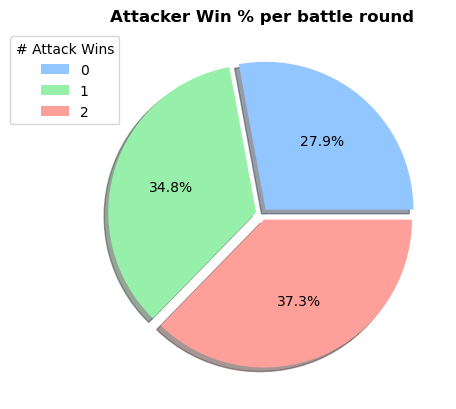

In [94]:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
# https://www.geeksforgeeks.org/matplotlib-axes-axes-pie-in-python/

plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title('Attacker Win % per battle round', weight='bold')

# Set values for slice explosion
# https://how2matplotlib.com/matplotlib-pie-chart.html
explode = (0.04,0.04,0.04)

# Create pie chart
ax.pie(frequency, explode = explode, autopct='%1.1f%%', shadow = True)

# Add legend
# https://matplotlib.org/stable/api/legend_api.html#matplotlib.legend.Legend
ax.legend(title='# Attack Wins', labels = unique, loc = 'upper left', bbox_to_anchor=(-0.2,1))

## Brief (Part Two) ##

Extend the above to simulate a full series of rounds for armies of arbitrary sizes, until one side is wiped out, and plots the results.

In [103]:
# User inputs size of armies:
attacking_army_size = int(input("Enter the size of the attacking army: "))
defending_army_size = int(input("Enter the size of the defending army: "))

In [108]:
# Print user input
print(f"The size of the attacking army is {attacking_army_size}")
print(f"The size of the defending army is {defending_army_size}")

The size of the attacking army is 120
The size of the defending army is 32


## Create Functions ##

### Dice Roll Function ###

In [98]:
# function for simulating a dice roll, taking number of dice as input, and sorting list of rolls in descending order.
def dice_roll(num_dice):
    rolls = rng.integers(1, 7, size=num_dice)
    rolls.sort()
    rolls = np.flip(rolls)
    return rolls

In [102]:
# Test dice roll function
dice_roll(7)

array([6, 5, 3, 3, 3, 2, 1], dtype=int64)

### Battle Simulation Function ###

## End ##